In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




In [12]:
#load dataset

df = pd.read_csv('dataset/main/credit_train.csv')

In [22]:
# Data Preprocessing
# Handle missing values
df.fillna(0, inplace=True)  # Replace missing values with 0 for simplicity

def convert_credit_sum(value):
    try:
        return float(value.replace(',', '.'))
    except:
        return 0
    
# Convert incorrect data types to numerical
df['credit_sum'] = df['credit_sum'].apply(convert_credit_sum)
df['score_shk'] = df['score_shk'].str.replace(',', '.').astype(float)

# Convert categorical variables to numerical using one-hot encoding
categorical_features = ['gender', 'marital_status', 'job_position', 'tariff_id', 'education']
df_encoded = pd.get_dummies(df, columns=categorical_features)

df_encoded.info()


AttributeError: Can only use .str accessor with string values!

In [23]:
df_encoded.drop(['living_region'], axis=1, inplace=True)

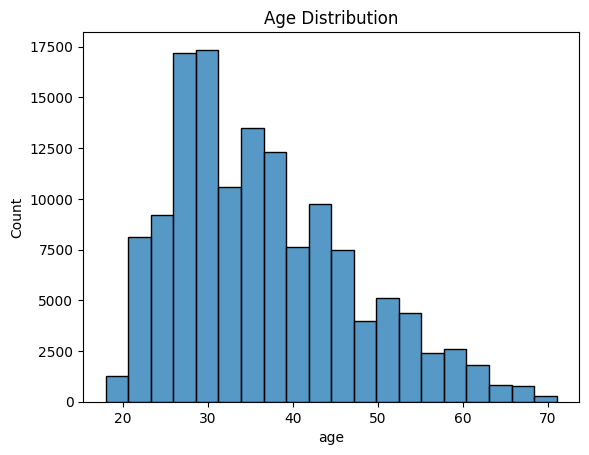

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
sns.histplot(data=df_encoded, x='age', bins=20)
plt.title('Age Distribution')
plt.show()



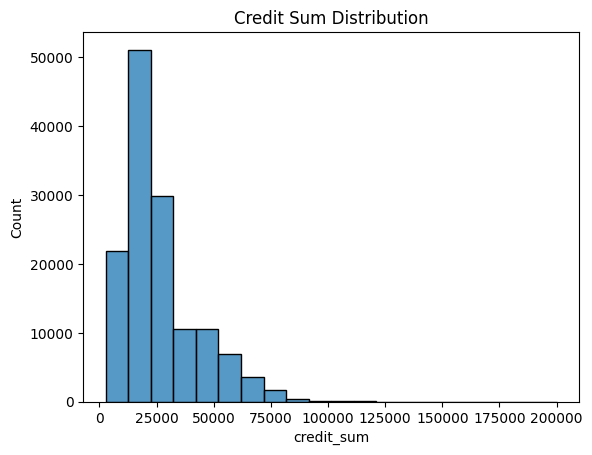

In [15]:
# Plot credit_sum distribution
sns.histplot(data=df_encoded, x='credit_sum', bins=20)
plt.title('Credit Sum Distribution')
plt.show()

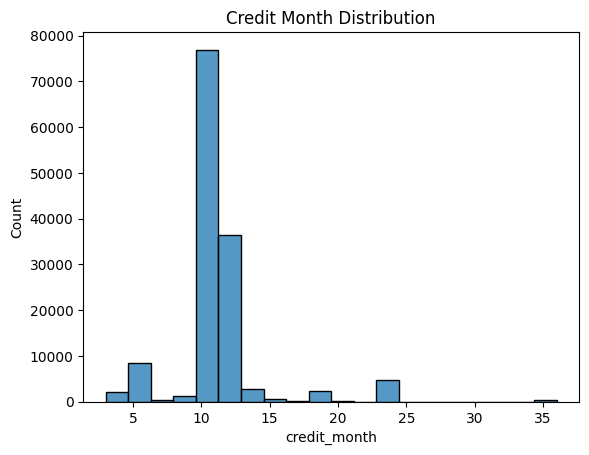

In [16]:
# Plot credit_month distribution
sns.histplot(data=df_encoded, x='credit_month', bins=20)
plt.title('Credit Month Distribution')
plt.show()

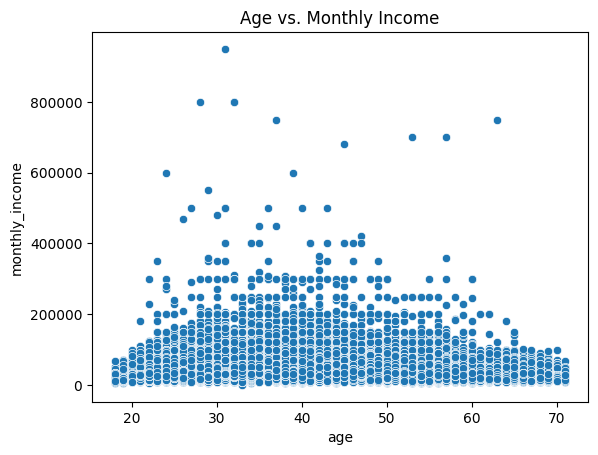

In [17]:
# Plot scatter plot for age vs. monthly_income
sns.scatterplot(data=df_encoded, x='age', y='monthly_income')
plt.title('Age vs. Monthly Income')
plt.show()

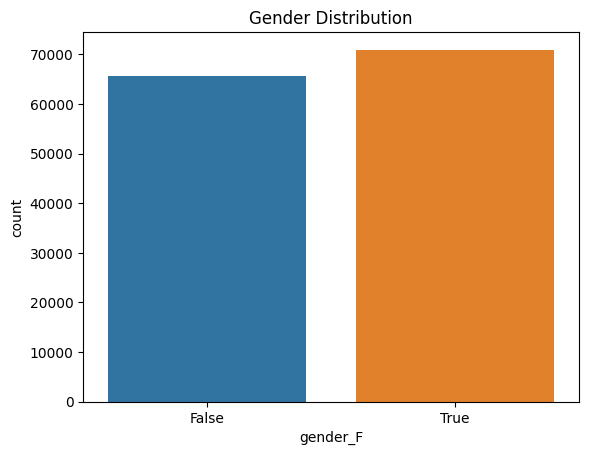

In [18]:
# Plot bar plot for gender distribution
sns.countplot(data=df_encoded, x='gender_F')
plt.title('Gender Distribution')
plt.show()

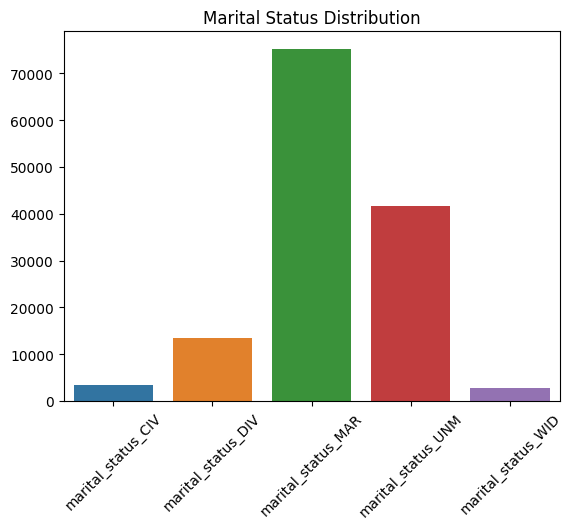

In [20]:
# Plot bar plot for marital status distribution
marital_cols = ['marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID']
df_marital = df_encoded[marital_cols].sum()
sns.barplot(x=df_marital.index, y=df_marital.values)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

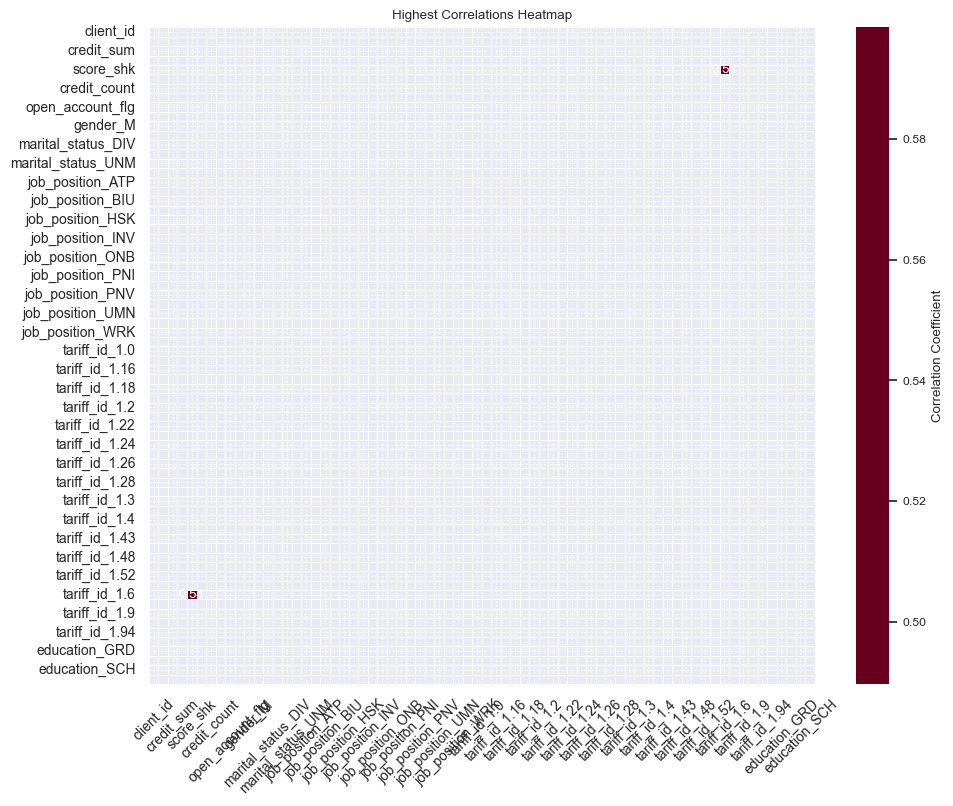

In [28]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Define a threshold for correlation values
threshold = 0.5

# Filter correlation matrix to keep only values above the threshold
high_correlations = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1)]

plt.figure(figsize=(10, 8))
sns.heatmap(high_correlations, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=0.5, cbar=True,
            cbar_kws={'label': 'Correlation Coefficient'})

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize=10)

# Add white grid lines
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Adjust font size of annotations
sns.set(font_scale=0.8)

plt.tight_layout()
plt.title('Highest Correlations Heatmap')
plt.show()